<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Steady flow to wells
*Developed by Mark Bakker*

In [1]:
from pylab import *
%matplotlib inline

### One-dimensional, radial flow

The governing equation for one-dimensional,
potential flow, written in radial coordinates $r$ is

$$
\nabla^2 \Phi = \frac{\text{d}^2\Phi}{\text{d} r^2}+\frac{1}{r}\frac{\text{d}\Phi}{\text{d}
r}= -N
$$

The general solution to this
differential equation is

$$
\Phi=-\frac{1}{4}Nr^2 +A\ln r + B
$$

where $A$ and $B$ are constants to be evaluated from boundary
conditions. The discharge vector is obtained, as before, as minus
the gradient of the discharge potential. In polar coordinates, the
radial component of the discharge vector is $Q_r=-\text{d} \Phi/\text{d}
r$.

Radial flow problems and solutions are important in groundwater
engineering because they represent the local flow field around
pumping wells. Solutions to three example problems of radial flow
are provided below.

#### Flow to a well at the center of a circular island without recharge
The discharge potential that is the solution to this problem is
referred to as $\Phi_1$. The following boundary conditions fix the
head at the perimeter of the island ($r=R$) and the perimeter of
the well ($r=r_w$), respectively

$$
\Phi_{1}(r=R)=\Phi_R
$$

$$
\Phi_{1}(r=r_w)=\Phi_w
$$

Application of the boundary conditions to the general solution,
using $N=0$, results in the following discharge potential

$$
\Phi_{1}=\frac{\Phi_R-\Phi_w}{\ln{(R/r_w)}}\ln{(r/R)}+\Phi_R
$$

The discharge rate of the well, $Q$ [L$^3$/T], may be obtained by
evaluating the discharge vector $Q_r(r=r_w)$ and multiplying by
the perimeter of the well

$$
Q=-2\pi r_w Q_r(r=r_w)=2\pi\frac{\Phi_R-\Phi_w}{\ln{(R/r_w)}}
$$

This equation is useful to compute the discharge for a desired head at the well.  
In practice, it is more common to know the discharge of a well. 
If the discharge of the well is known, the solution may be written as 

$$
\Phi_1=\frac{Q}{2\pi}\ln{(r/R)} + \Phi_R
$$

This equation is known as the Thiem equation. The radial component of the discharge vector for a steady well is

$$
Q_r = -\frac{\text{d}\Phi}{\text{d}r} = -\frac{Q}{2\pi}\frac{1}{r}
$$

In many two-dimensional problems or
problems with recharge, the condition at the well is approximated as

$$
Q=\lim_{r_w \to 0}-2\pi r_w Q_r(r=r_w)
$$

This condition often produces accurate results as the radius of the well is commonly
much smaller than the horizontal scale of the groundwater problem
being considered. 

#### Recharge on a circular island
The solution for recharge on a circular island is referred to as $\Phi_2$. Once again,
the head is fixed at the perimeter of the island

$$
\Phi_2(r=R)=\Phi_R
$$

By consideration of symmetry, the second boundary condition may be
written as

$$
Q_r(r=0)=0
$$

Application of the boundary conditions to the
general solution results in the following discharge potential

$$
\Phi_2 = -\frac{1}{4}N (r^2-R^2) + \Phi_R
$$

Note that, by continuity of flow, the total groundwater discharge
at the perimeter of the island is

$$
Q_r(r=R) 2 \pi R = N \pi R^2
$$

which may also be derived by taking the derivative of $\Phi_2$ and multiplying by the circumference of the island.

#### Well at the center of a circular island with recharge 
This problem contains both the features of the
first two examples: recharge, and a pumping well. Here the
boundary conditions are specified as

$$
\Phi_3(r=R)=\Phi_R
$$

$$
Q=\lim_{r_w \to 0}-2\pi r_w Q_r(r=r_w)
$$

Application of the boundary conditions to the general solution
yields the following discharge potential

$$
\Phi_3 = -\frac{1}{4}N (r^2-R^2) + \frac{Q}{2\pi} \ln{(r/R)}
+\Phi_R
$$

The head as a function of radial distance from the well is shown
in the figure below. The blue line represents the
case for which the well pumps half the total areal recharge
entering the aquifer, and the red line represents the case
for which the well pumps exactly all the recharge on the island.
Note that for the latter case, the flow at the perimeter of the
island is zero and thus the phreatic surface is horizontal there; furthermore, the
drawdown at the well is much larger than for the former case. It
is emphasized that it is easy to create a case for which the well
cannot pump all the infiltrated water. Theoretically, the maximum
discharge is reached when the water level at the well is at the
bottom of the aquifer; the practical limit is much less, of
course. When the specified discharge of the well is
not possible, the potential at the well will be negative, and thus
a head cannot be computed as $h=\sqrt{2\Phi/k}$
for unconfined flow and for confined flow the head would be negative and below the base of the aquifer.

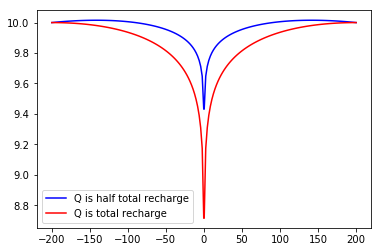

In [2]:
k = 10
N = 0.001
R = 200
hR = 10  # head at edge of island
rw = 0.3

Q1 = 0.5 * N * pi * R ** 2  # half total recharge
Q2 = N * pi * R ** 2  # total recharge
r = linspace(rw, R, 100)
PhiR = 0.5 * k * hR ** 2
Phi = -0.25 * N * (r ** 2 - R ** 2) + Q1 / (2 * pi) * log(r / R) + PhiR
h = sqrt(2 * Phi / k)
plot(r, h, 'b', label='Q is half total recharge')
plot(-r, h, 'b')
Phi = -0.25 * N * (r ** 2 - R ** 2) + Q2 / (2 * pi) * log(r / R) + PhiR
h = sqrt(2 * Phi / k)
plot(r, h, 'r', label='Q is total recharge')
plot(-r, h, 'r')
legend(loc='best');

### The principle of superposition
Comparison of the
solutions to the three example problems above reveals that the
third solution is the sum of the first two solutions with the
additive constant modified. Addition of multiple solutions to
obtain another solution is an example of the principle of
superposition, which is applicable to all linear differential
equations, including the equations of Laplace and Poisson.

The sum of the potentials of the first two problems in the previous section
satisfies the differential equation of the third
problem

$$
\nabla^2\Phi_3=
\nabla^2(\Phi_1+\Phi_2)=\nabla^2\Phi_1+\nabla^2\Phi_2= 0 - N=-N
$$

Similarly, the boundary condition at the well is
satisfied by the sum of the two potentials.  Finally, the value of
the sum of the two potentials at $r=R$ is a constant

$$
\Phi_3(r=R)=\Phi_1(r=R)+\Phi_2(r=R)=2\Phi_R
$$

This is not the value specified in the boundary condition
($\Phi(r=R)=\Phi_R$), but this is easily corrected by modification of
the additive constant.


In this example of superposition, two radial solutions are added
such that the resulting solution is also radial, one-dimensional
flow.  In general, however, superposition of
radial flow solutions results in two-dimensional
flow.  As an example, consider two pumping wells of strengths
$Q_1$ and $Q_2$ at locations $(x_1, y_1)$ and $(x_2,y_2)$ in an
infinite aquifer. By superposition, the discharge potential is

$$
\Phi=\frac{Q_1}{2\pi}\ln r_1 + \frac{Q_2}{2\pi}\ln r_2 + A
$$

where $r_1=\sqrt{(x-x_1)^2+(y-y_1)^2}$,
$r_2=\sqrt{(x-x_2)^2+(y-y_2)^2}$, and $A$ is a constant that may
be determined from a reference point of known potential. 

As an example, the flow field is computed for the case of two wells where the discharge of the well
on the left is twice the discharge of the well on the right. The
resulting contours of head are presented in the figure below with blue lines and indicate that
the superposition of the two one-dimensional solutions results in
a truly two-dimensional flow field. The red lines in the figure  are streamlines.

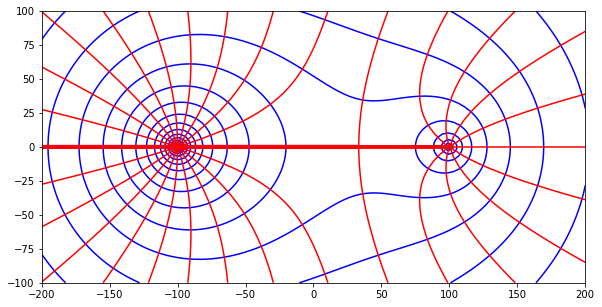

In [3]:
x1 = -100
y1 = 0
Q1 = 100
x2 = 100
y2 = 0
Q2 = 50

x, y = meshgrid(linspace(-200, 200, 100), linspace(-100, 100, 100))
r1 = sqrt((x - x1) ** 2 + (y - y1) ** 2)
r2 = sqrt((x - x2) ** 2 + (y - y2) ** 2)
Phi = Q1 / (2 * pi) * log(r1) + Q2 / (2 * pi) * log(r2)
Psi = Q1 / (2 * pi) * arctan2(y, x - x1) + Q2 / (2 * pi) * arctan2(y, x - x2)
Phimin, Phimax = Phi.min(), Phi.max()
step = Q1 / 20

figure(figsize=(10, 5))
contour(x, y, Phi, arange(Phimin, Phimax, step), colors='b', linestyles='solid')
contour(x, y, Psi, arange(-Q1, Q1, step), colors='r', linestyles='solid')
axis('scaled');

### A well in uniform flow
The case of confined flow to a well in an otherwise uniform flow
field is another example of the principle of
superposition. The potential for a uniform flow $Q_{x0}$ in the positive $x$-direction is given by

$$
\Phi = -Q_{x0}x
$$

such that $Q_x=Q_{x0}$. When the head gradient in the $x$-direction is $\partial h/\partial x$, then the uniform flow may be estimated as $Q_{x0} = -T\partial h/\partial x$, where $T$ is the transmissivity. The potential
for a well in uniform flow is obtained through superposition of
the potential for uniform flow and a steady well
located at the origin  plus an arbitrary constant
$\Phi_0$

$$
\Phi = -Q_{x0}x + \frac{Q}{2\pi}\ln(r) + \Phi_0
$$

An example of head contours obtained from this solution is shown
in the figure below. The heavy line in the figure
is part of two streamlines that separate the
groundwater flowing to the well from the groundwater that flows
past the well. This dividing streamline forms the capture zone
envelope of the well.

<img src="gwfig8.png" width="450">

**Figure** Head contours for a well in uniform flow (dotted). 
Capture zone envelope (heavy solid line), 5 year capture zone (small dashed contour), 20 year capture zone (large dashed contour).

It is important to protect drinking water wells from contamination
and many countries have guidelines for the delineation and
protection of capture zones for water supply wells. Guidelines
commonly require protection of the zone of groundwater around the
well that will be captured by the well within a certain period of
time, for example 5 years or 20 years. These capture zones and
capture zones for other time periods all lie within the capture
zone envelope. The dashed lines in the figure above 
represent the 5 and 20 year capture zones for this case. In most
cases, capture zones are actually three-dimensional parts of the
aquifer, but they are commonly approximated as two-dimensional
zones on a map.

The width $W$ of the capture zone envelope far upstream of the well may be computed from continuity as

$$
W = Q / Q_{x0}.
$$

At the well ($x=0$), the width of the capture zone is reduced to
$W/2$. Special attention is paid to the point on the capture zone
envelope farthest downstream of the well. This is a stagnation
point, as the discharge vector is, theoretically, zero there. At
the stagnation point, the effect of the well is exactly balanced
by the hydraulic gradient of the uniform flow. The capture zone
boundaries for large times approach the stagnation point, but only
the boundary of the capture zone envelope passes through it.

For this simple problem, the capture zones for any time period may
be evaluated analytically (Bear and Jacobs, 1965). It is more
common, however, to evaluate the capture zone boundaries by
particle tracking methods (e.g., Strack, 1989; Bakker and Strack, 1996).


### The method of images

The method of images is an application of the superposition
principle. Wells or other singularities are placed outside of the
problem domain using symmetry to satisfy conditions specified
along a boundary. For example, if two wells
have the same discharge $(Q_1=Q_2=Q)$, and are placed
symmetrically about the $y$-axis ($x_2=-x_1$, $y_1=y_2=0$), the discharge potential becomes

$$
\Phi=\frac{Q}{2\pi}\ln(r_1 r_2) + A
$$

Investigation of the
behavior of this solution along the line passing midway between
the wells $(x=0)$ shows that the $x$-component of the discharge
vector is zero. This potential is the solution to
the problem of a well pumping next to an infinitely long
impermeable boundary in a semi-infinite aquifer. As the problem
domain lies to the left of the impermeable line, the well
operating at $(+x_1,0)$ is referred to as the image well. Contours
of the discharge potential are shown in the figure below.

Another solution is obtained when the image well at $(+x_1,
0)$ is given the opposite discharge of the pumping well

$$
\Phi=\frac{Q}{2\pi}\ln\frac{r_1}{r_2} + A
$$

Investigation of the behavior of this discharge potential shows
that the potential is constant and equal to $A$ along the line
$x=0$.  This discharge potential is the solution
to the problem of a well pumping near a large lake or fully
penetrating stream of constant potential $A$ whose boundary lies
along $x=0$. Again, the image wells lie outside the problem
domain. Contours of the discharge potential are shown in the figure below.

Superposition and the method of images are two of the primary
tools available to hydrologists and engineers for developing
analytical solutions to steady and transient groundwater flow
problems.  Many analytical solutions to problems with wells and
equipotential and/or impermeable boundaries may be obtained by the
method of images. The method is also applicable to heterogeneity
boundaries (Maxwell, 1873; Muskat, 1933) and leaky (Cauchy-type)
boundaries (Keller, 1953; Anderson, 2000). 

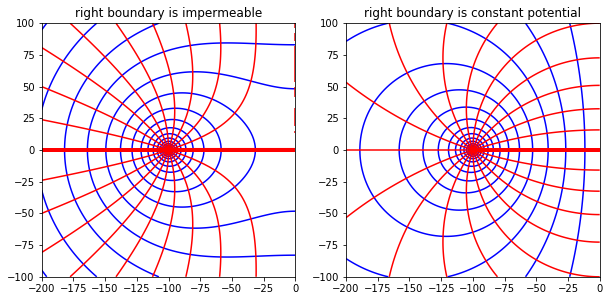

In [4]:
x1 = -100
y1 = 0
x2 = 100
y2 = 0
Q = 100

x, y = meshgrid(linspace(-200, 0, 100), linspace(-100, 100, 100))
r1 = sqrt((x - x1) ** 2 + (y - y1) ** 2)
r2 = sqrt((x - x2) ** 2 + (y - y2) ** 2)

Phi = Q / (2 * pi) * log(r1 * r2)
Psi = Q / (2 * pi) * (arctan2(y, x - x1) + arctan2(y, x - x2))
Phimin, Phimax = Phi.min(), Phi.max()
step = Q / 20
figure(figsize=(10, 5))
subplot(121)
contour(x, y, Phi, arange(Phimin, Phimax, step), colors='b', linestyles='solid')
contour(x, y, Psi, arange(-Q1, Q1, step), colors='r', linestyle='-', linestyles='solid')
axis('scaled')
title('right boundary is impermeable')

Phi = Q / (2 * pi) * log(r1 / r2)
Psi = Q / (2 * pi) * (arctan2(y, x - x1) - arctan2(y, x - x2))
Phimin, Phimax = Phi.min(), Phi.max()
step = Q / 20
subplot(122)
contour(x, y, Phi, arange(Phimin, Phimax, step), colors='b', linestyles='solid')
contour(x, y, Psi, arange(-Q1, Q1, step), colors='r', linestyles='solid')
axis('scaled')
title('right boundary is constant potential');

### The stream function and the complex potential
Head contours have been defined previously as curves of constant
head which allow us to visualize the variation of mechanical
energy within a flow field. In homogeneous aquifers, head contours are equal to potential contours, 
called equipotentials. Streamlines allow for the visualization of the average paths of groundwater flow. Streamlines are
defined as lines that are everywhere tangent to the discharge
vector. Using this definition, a differential equation may be
written for a streamline

$$
\frac{Q_y}{Q_x}=\frac{\cos\alpha}{\sin\alpha}=\frac{\text{d}y/\text{d}s}{\text{d}x/\text{d}s}
$$

where $s$ is the position along the streamline and $\alpha$ is the
angle between the $s$ and $x$ axes. Substituting in Darcy's law,
the equation becomes

$$
-\frac{\partial\Phi}{\partial y}\frac{\text{d}x}{\text{d}s}+
\frac{\partial\Phi}{\partial x}\frac{\text{d}y}{\text{d}s}=0
$$

By Darcy's law, the discharge vector is everywhere normal to
equipotentials. Examples are provided in the previous example
which shows streamlines and equipotentials for flow to a well near
an impermeable boundary and near an equipotential boundary.  Note
that the two sets of lines cross everywhere at right angles.

Equipotentials and streamlines may both be drawn for problems of
steady groundwater flow governed by the equations of Laplace and
Poisson.  However, in the case of Laplace's equation, a special
function exists -- the stream function, or $\Psi(x,y)$ -- whose
contours represent streamlines.  The stream function exists for
steady, two-dimensional, divergence-free groundwater flow. As the
value of the stream function does not change along a streamline,

$$
\frac{\text{d}\Psi}{\text{d}s}=\frac{\partial\Psi}{\partial x}\frac{\text{d}x}{\text{d}s}+
\frac{\partial\Psi}{\partial y}\frac{\text{d}y}{\text{d}s}=0
$$

By comparison of the previous two sets of equations the following
relationships are obtained between derivatives of the discharge
potential and the stream function:

$$
\frac{\partial \Phi}{\partial x}=\frac{\partial \Psi}{\partial y}
$$

$$
\frac{\partial \Phi}{\partial y}=-\frac{\partial \Psi}{\partial x}
$$

These equations are known as the
Cauchy-Riemann equations (e.g., Strack, 1989).  It may also be shown that the stream
function is single-valued, and harmonic ($\nabla^2\Psi=0$). These
properties of the stream function indicate that it is the harmonic
conjugate of the discharge potential.  Given a discharge potential
that satisfies Laplace's equation, the corresponding stream
function may be evaluated from the Cauchy-Riemann conditions.

The properties of the discharge potential and the stream function
suggest the use of complex variables to solve groundwater flow
problems governed by Laplace's equation. There are many texts on
complex variables including their use in solving groundwater flow
problems (e.g., Polubarinova-Kochina 1962; Verruijt 1970; Bear 1972; Strack 1989). The topic is only briefly discussed here.

For groundwater problems governed by Laplace's equation, a complex
potential $\Omega$ exists which is an analytic function of the
complex coordinate $z=x+iy$. The real part of the complex
potential is the discharge potential and the imaginary part is the
stream function

$$
\Omega(z)=\Phi(x,y)+i\Psi(x,y)
$$

The negative derivative of the complex potential is the complex
discharge

$$
W(z)=-\frac{d\Omega}{dz} = Q_x-iQ_y
$$

Introduction of complex variables allows for the use of more
sophisticated tools, including conformal mapping, to solve many
groundwater flow problems. In particular, using complex variables
allows for the simultaneous solution of the discharge potential
and the stream function.  An example demonstrating the utility of the
stream function and the complex potential is presented below. 



#### Evaluation of the capture zone envelope using the complex potential

The complex potential for a well in an otherwise uniform flow
field is

$$
\Omega=-Q_{x0}z+\frac{Q}{2\pi}\ln z +\Phi_0
$$

Separation into real and imaginary parts shows that the discharge
potential is the same as obtained previously

$$
\Phi=-Q_{x0}x+\frac{Q}{2\pi}\ln r +\Phi_0
$$

$$
\Psi=-Q_{x0}y+\frac{Q}{2\pi}\theta
$$

where ($r,\theta$) are polar coordinates.  The location of the
stagnation point, $z_s$, is evaluated as

$$
W(z=z_s)=0
$$

which gives

$$
z_s=\frac{Q}{2\pi Q_{x0}}
$$

The value of the complex potential at the stagnation point is

$$
\Omega(z=z_s)=-\frac{Q}{2\pi}\left[1-\ln\left(\frac{Q}{2\pi Q_{x0}}\right)\right] +\Phi_0
$$

which is a purely real number.  Therefore, the value of the stream
function at the stagnation point is zero.  The contour
$\Psi=0=\Psi_s$ defines the capture zone envelope

$$
-Q_{x0}y+\frac{Q}{2\pi}\theta=0
$$

The equation for the capture zone envelope is obtained in polar
coordinates using $y=r\sin\theta$ and solving the equation above for $r$, which gives

$$
r=\frac{Q}{2\pi}\frac{\theta}{Q_{x0}\sin\theta}
$$

In the example below, these equations are implemented and the capture zone envelope is shown as a thick black line.

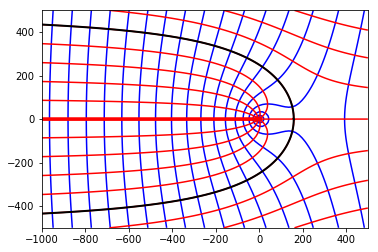

In [5]:
Q = 100
Qx0 = 0.1
x, y = meshgrid(linspace(-1000, 500, 100), linspace(-500, 500, 100))
z = x + y * 1j
omega = Q / (2 * pi) * log(z) - Qx0 * z
Phimin = omega.real.min()
Phimax = omega.real.max()
contour(x, y, omega.real, arange(Phimin, Phimax, Q / 10), colors='b', linestyles='solid')
contour(x, y, omega.imag, arange(-Q, Q, Q / 10), colors='r', linestyles='solid')

theta = np.linspace(-3, 1e-4, 100)
r = Q / (2 * pi) * theta / (Qx0 * sin(theta))
plot(r * cos(theta), r * sin(theta), 'k', lw=2)
plot(r * cos(theta), -r * sin(theta), 'k', lw=2)
axis('scaled')
xlim(-1000, 500)
ylim(-500, 500);

### Exercise 1

A well is pumping at an unknown, steady rate in a confined aquifer. Near the pumping well are two observation wells. Observation well A is located 8 m from the pumping well and observation well B is located 24 m from the pumping well. The heads in these wells are: $h_A = 134.2$ m and $h_B = 134.3$ m. You know from a pumping test at the well that the well and the observation well are screened in a confined aquifer with transmissivity $T = 1200$ m$^2$/day. Assuming that without the well pumping there would be no hydraulic gradient at all, what is the pumping rate of the well?

In [6]:
hA = 134.2
hB = 134.3
rA = 8
rB = 24
T = 1200
Q = 2 * pi * T * (hB - hA) / log(rB / rA)
print('Q:', Q, 'm^3/d')

Q: 686.304208171 m^3/d


### Exercise 2
A well is located 65 m from the shore of a river that is roughly straight near the well. The well is installed in a 0.8 m diameter hole. The well screen and the river are in direct contact with the same aquifer, which has an estimated transmissivity $T = 150$ m$^2$/day. Estimate the drawdown at the well, assuming it is pumped for a long time at a rate of $Q = 600$ m$^3$/day.

In [7]:
r1 = 0.4
r2 = 130
Q = 600
T = 150
d = -Q / (2 * pi * T) * log(r1 / r2)
print('drawdown at well:', round(d, 2), 'm')

drawdown at well: 3.68 m


### Exercise 3

A well pumps 2500 m$^3$/day in an aquifer, in a corner between an impermeable slurry wall and a canal, as shown in the figure below. Derive an equation for the head as a function of position, assuming the aquifer has constant transmissivity $T$. 
If the transmissivity is $T = 600$ m$^2$/day, what is the head at the location $(x, y) =(10, 40)$. Make a contour plot of the head. 

(-10, 80)

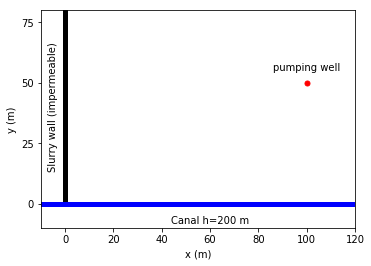

In [8]:
plot([0, 0], [0, 80], 'k', lw=5)
text(-5, 40, 'Slurry wall (impermeable)', rotation=90, ha='center', va='center')
plot([-10, 120], [0, 0], 'b', lw=5)
text(60, -7, 'Canal h=200 m', ha='center', va='center')
yticks([0, 25, 50, 75])
xlabel('x (m)')
ylabel('y (m)')
plot(100, 50, 'ro', markersize=5)
text(100, 55, 'pumping well', ha='center')
plt.axis('scaled')
xlim(-10, 120)
ylim(-10, 80)

head at (x,y)=(10,40): 199.607045205 m


(0.0, 150.0, 0.0, 100.0)

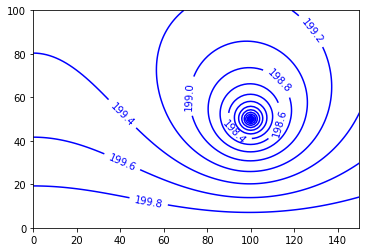

In [9]:
x1, y1 = 100, 50
x2, y2 = -100, 50
x3, y3 = 100, -50
x4, y4 = -100, -50
T = 600
h0 = 200
Q = 2500

def head(x, y):
    r1 = sqrt((x - x1) ** 2 + (y - y1) ** 2)
    r2 = sqrt((x - x2) ** 2 + (y - y2) ** 2)
    r3 = sqrt((x - x3) ** 2 + (y - y3) ** 2)
    r4 = sqrt((x - x4) ** 2 + (y - y4) ** 2)
    h = Q / (2 * pi * T) * log(r1 * r2 / (r3 * r4)) + h0
    return h

print('head at (x,y)=(10,40):', head(10, 40), 'm')

x, y = meshgrid(linspace(0, 150, 100), linspace(0, 100, 100))
h = head(x, y)
c = contour(x, y, h, 20, colors='b')
clabel(c, fmt='%1.1f')
axis('scaled')

### Exercise 4
Consider a discharge well and a recharge well with equal but opposite discharge $Q$ (see Figure). The distance between the two wells is $2d$ and the radius of each well is $r_w$. The two wells are located in an otherwise uniform flow from West to East and before the wells started pumping the gradient is $\partial h/\partial x=a$. The transmissivity of the aquifer is $T$. The head is $h_0$ at a distance $2d$ downstream of the discharge well when both wells are pumping. Flow is at steady state and confined.

Questions:

a) Derive an expression for the head as a function $x$ and $y$.

b) Compute the head at the discharge well using $Q = 1000$ m$^3$/d, $d= 50$ m, $T= 200$ m$^2$/d, a = -0.002, $r_w = 0.2$ m, and $h_0= 20$ m.

c) Give an expression (don't substitute numbers) for the discharge $Q$ if the head at the discharge
well is required to be equal to $h_1$.

d) Draw a flow net and clearly indicate the dividing streamlines. 

e) Determine an expression for the $x$-locations of the stagnation points.

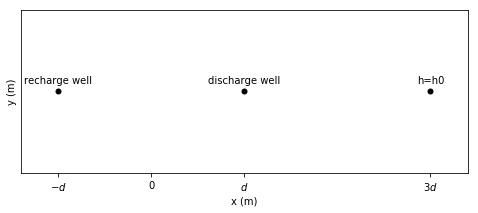

In [10]:
figure(figsize=(8, 3))
plot([-50, 50, 150], [0, 0, 0], 'ko', markersize=5)
text(-50, 0.5, 'recharge well', ha='center')
text(50, 0.5, 'discharge well', ha='center')
text(150, 0.5, 'h=h0', ha='center')
ylim(-5, 5)
xlim(-70, 170)
yticks([])
xlabel('x (m)')
ylabel('y (m)')
xticks([-50, 0, 50, 150], ['$-d$', 0, '$d$', '$3d$']);

c) $$Q = \frac{2\pi T(h_1-h_0-2Q_{x0}d)}{\ln(r_w/d)}$$

e) $$Q_x = -\frac{Q}{2\pi} \left[ \frac{x-d}{r_1^2} – \frac{x+d}{r_2^2} \right] + Q_{x0}$$

$$Q_x(x,y=0) = -\frac{Q}{\pi} \frac{ d }{x^2-d^2} + Q_{x0} = 0 \to x_s = \pm \sqrt{ d^2 + \frac{Qd}{\pi Q_{x0}}}$$

head at discharge well: 18.0042770761 m
stagnation points at: -149.647478717 and 149.647478717


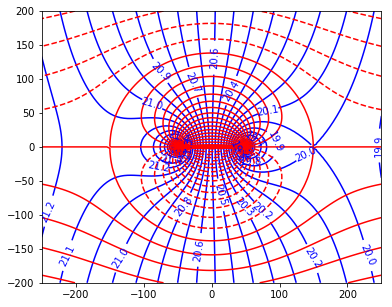

In [11]:
Q = 500
d = 50
T = 200
a = -0.002
rw = 0.2
h0 = 20

Qx0 = -T * a
Phi0 = T * h0

def head(x, y):
    r1 = sqrt((x - d) ** 2 + y ** 2)
    r2 = sqrt((x + d) ** 2 + y ** 2)
    Phi = Q / (2 * pi) * (log(r1 / (2 * d)) - log(r2 / (4 * d))) - Qx0 * (x - 3 * d) + Phi0
    return Phi / T

def psi(x, y):
    theta1 = arctan2(y, x - d)
    theta2 = arctan2(y, x + d)
    p = Q / (2 * pi) * (theta1 - theta2) - Qx0 * y
    return p

print('head at discharge well:', head(d - rw, 0), 'm')

x, y = meshgrid(linspace(-5 * d, 5 * d, 100), linspace(-4 * d, 4 * d, 100))

h = head(x, y)
p = psi(x, y)
figure(figsize=(10, 5))
c = contour(x, y, h, 40, colors='b')
clabel(c, fmt='%1.1f')
contour(x, y, p, 40, colors='r')
axis('scaled')

xs = sqrt(d ** 2 + Q * d / (pi * Qx0))
print('stagnation points at:', -xs, 'and', xs)

### References
Anderson EI (2000) The method of images for leaky boundaries. Advances in Waterer Resources 23: 461-74.  
Bakker M and Strack ODL (1996) Capture zone delineation in two-dimensional groundwater flow models. Water Resources Research, 32(5): 1309-1315.  
Bear J and Jacobs M (1965) On the movement of water bodies injected into aquifers, Journal of Hydrology 3: 37-57.  
Bear J (1972) Dynamics of fluids in porous media. Dover Publications, New York.  
Keller, JB (1953) The scope of the image method, Communications on Pure and Applied Mathematics, Vol VI: 505-512.  
Maxwell JC (1973) A Treatise on Electricity and Magnetism, Vol. 1. Clarendon Press, Oxford.  
Muskat, M (1933) Potential distribution about an electrode on the surface of the Earth. Physics 4(4): 129-147.  
Polubarinova-Kochina PY (1962) Theory of Groundwater Movement (translated by JMR De Wiest). Princeton University Press, Princeton, NJ.  
Strack ODL (1989) Groundwater Mechanics. Prentice Hall, Englewood Cliffs, NJ.
Verruijt A (1970) Theory of Groundwater Flow. MacMillan, New York.  

**Note:** This Notebook is adapted from a document that is published as M Bakker and EI Anderson. 2011. Mechanics of Groundwater Flow. In: *Treatise on Water Science*, vol. 2, edited by P Wilderer, Academic Press, Oxford, 115-134.